In [8]:

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:

with open("../data/rotten_tomatoes_movies_data_with_score_panels.json", "r") as fp:
    data = json.load(fp)
    
print(len(data))


4486


# Movie_Data_2k:

- This is smallest, yet most comprehensive version of the collected information w.r.t. to the comprehensiveness of columns related to features and network data

In [10]:


issues = []
errors = []


for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        tmp_box_office = v['Info']['Box Office (Gross USA)'].strip().split("$")[1]
        
        if "M" in tmp_box_office:
            box_office = float(tmp_box_office.split("M")[0]) * 1000000
        elif "K" in tmp_box_office:
            box_office = float(tmp_box_office.split("K")[0]) * 1000
        else:
            box_office = 0.
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'], 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
            'Producer': v['Info']['Producer'].strip(), 
            'Writer':  v['Info']['Writer'].strip(),
            'Top Cast': v["Top Cast"], 
            'Distributor': v['Info']['Distributor'].strip(),
            'Production Co': v['Info']['Production Co'].strip(),
            'Box Office (Gross USA)': box_office, 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Release Date (Theaters)': v['Info']['Release Date (Theaters)'].strip(),
            'Release Date (Streaming)': v['Info']['Release Date (Streaming)'].strip(), 
            'Link': k.strip()
        })

    except Exception as error:
        print(
            f"In {k} \n"
            f"{error} \n"
            f"occurred !"
        )
        issues.append(k)
        errors.append(error)
        
        
                

In https://www.rottentomatoes.com/m/the_promised_land_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/society_of_the_snow
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/argylle
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/lift_2024
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/rebel_moon_part_1_a_child_of_fire
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/the_legend_of_tarzan
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/the_family_plan
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/1017666-road_house
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/dangerous_waters_2023
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/freelance_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/the_bricklayer_2023
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/ghosted

In https://www.rottentomatoes.com/m/gremlins
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/spirited
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/theres_something_in_the_barn
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/batman_the_long_halloween_part_one
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/hannah_waddingham_home_for_christmas
 
invalid literal for int() with base 10: '44m' 
occurred !
In https://www.rottentomatoes.com/m/feast_of_the_seven_fishes
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/black_friday_2021
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/the_guardians_of_the_galaxy_holiday_special
 
invalid literal for int() with base 10: '44m' 
occurred !
In https://www.rottentomatoes.com/m/bad_santa
 
'Distributor' 
occurred !
In https://www.rottentomatoes.com/m/krisha_2016
 
'Production Co' 
occurred !

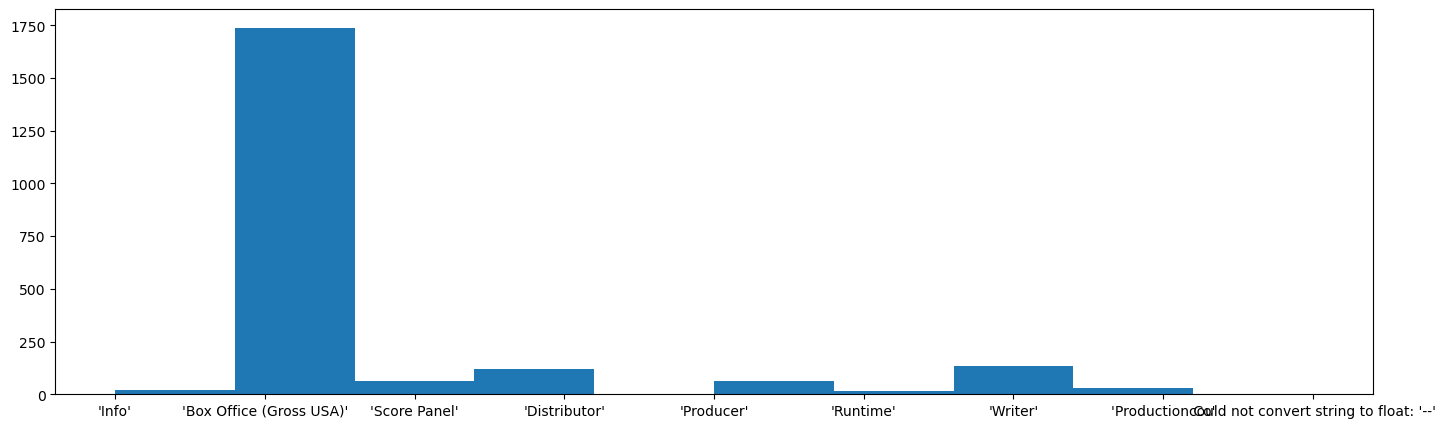

In [11]:

errors = [str(e) for e in errors ]
errors = [str(e) for e in errors if "invalid literal" not in e ]  # remove run-time errors for movies shorter an hour
plt.figure(figsize=(17, 5))
plt.hist(errors)
plt.show()




# Movie_Data_4k:

- The "Box office", "Distributer" , "Production Co.", "Release Date (Theaters)" and "Release Date (Streaming)" are dropped from the set of features to increase the number of data points

- The "Producer" is also drop from the corresponding network columns to increase the number of data points.

In [12]:




issues_4k = []
errors_4k = []


for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'].strip(), 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
            'Top Cast': v["Top Cast"], 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Link': k.strip()
        })
    except Exception as error:
        print(
            f"In {k} \n"
            f"{error} \n"
            f"occurred !"
        )
        issues_4k.append(k)
        errors_4k.append(error)
        
        
                

In https://www.rottentomatoes.com/m/the_promised_land_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/society_of_the_snow
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/the_legend_of_tarzan
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/the_family_plan
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/1017666-road_house
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/freelance_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/cowboys_and_aliens
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/the_hunt_2019
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/memory_2022
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/mortal_kombat_2021
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/the_tigers_apprentice
 
'Runtime' 
occurred !
In https://www.rottentomatoes.com/m/spider_man_across_the_spider_verse
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/

In https://www.rottentomatoes.com/m/host_2020
 
invalid literal for int() with base 10: '57m' 
occurred !
In https://www.rottentomatoes.com/m/werewolf_by_night
 
invalid literal for int() with base 10: '54m' 
occurred !
In https://www.rottentomatoes.com/m/cruella
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/goodnight_brooklyn_the_story_of_death_by_audio
 
could not convert string to float: '--' 
occurred !
In https://www.rottentomatoes.com/m/10011587-rocksteady_the_roots_of_reggae
 
'Original Language' 
occurred !
In https://www.rottentomatoes.com/m/lemonade_2016
 
invalid literal for int() with base 10: '46m' 
occurred !
In https://www.rottentomatoes.com/m/ever_deadly
 
could not convert string to float: '--' 
occurred !
In https://www.rottentomatoes.com/m/junun_2015
 
invalid literal for int() with base 10: '54m' 
occurred !
In https://www.rottentomatoes.com/m/guava_island
 
invalid literal for int() with base 10: '55m' 
occurred !
In https://www.rottentomatoes.com/m/roll

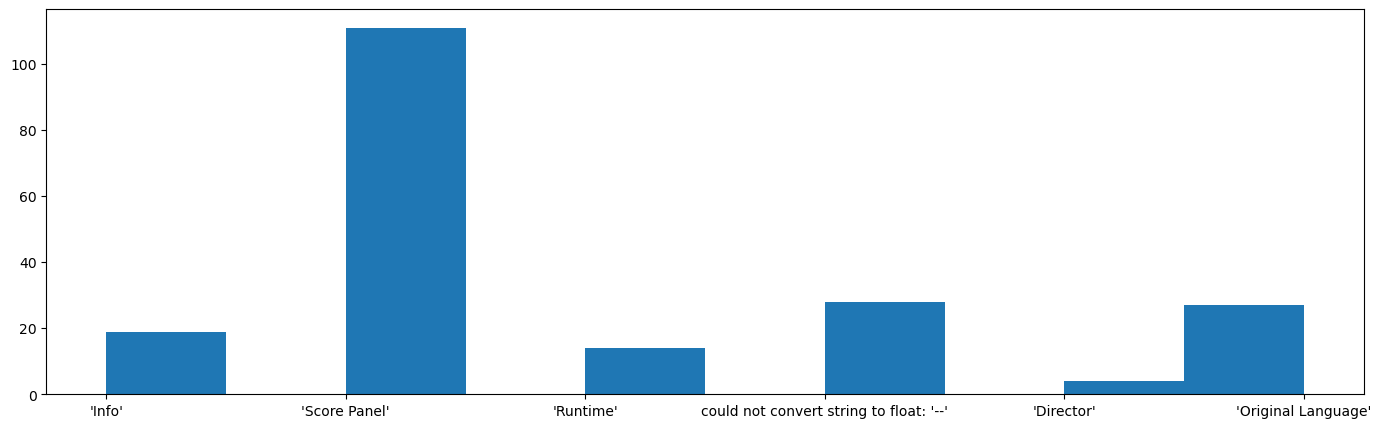

In [13]:

errors_4k = [str(e) for e in errors_4k ]
# removing run errors for movies shorter an hour
errors_4k = [str(e) for e in errors_4k if "invalid literal" not in e ]  

plt.figure(figsize=(17, 5))
plt.hist(errors_4k)
plt.show()




In [14]:

set(errors_4k)


{"'Director'",
 "'Info'",
 "'Original Language'",
 "'Runtime'",
 "'Score Panel'",
 "could not convert string to float: '--'"}

# EDA

In [15]:


medium_movies_data = pd.read_csv("../data/medium_movies_data.csv", )
medium_data_df_a = pd.read_csv("../data/medium_data_df_a.csv", )
medium_data_a = pd.read_csv("../data/medium_data_a.csv", )

print(medium_movies_data.shape, medium_data_df_a.shape, medium_data_a.shape)


(2262, 19) (2262, 2263) (2261, 2262)




## Data with around 2,000 movies



In [16]:


features_s = [
    'Title', 'Synopsis', 'Original Language', 'Runtime', 
    'Director', 'Producer', 'Writer', 'Top Cast',
    'Distributor', 'Production Co', 
    'Box Office (Gross USA)', 
    'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
    'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'
]

q_features_s = ['Runtime', 'Box Office (Gross USA)', 'Tomato Meter', 'Audience Score', 'No. Reviews', ]

c_features_s = ['Original Language', 'Genre',]

network_columns_s = [ 'Director', 'Producer', 'Writer', 'Top Cast']



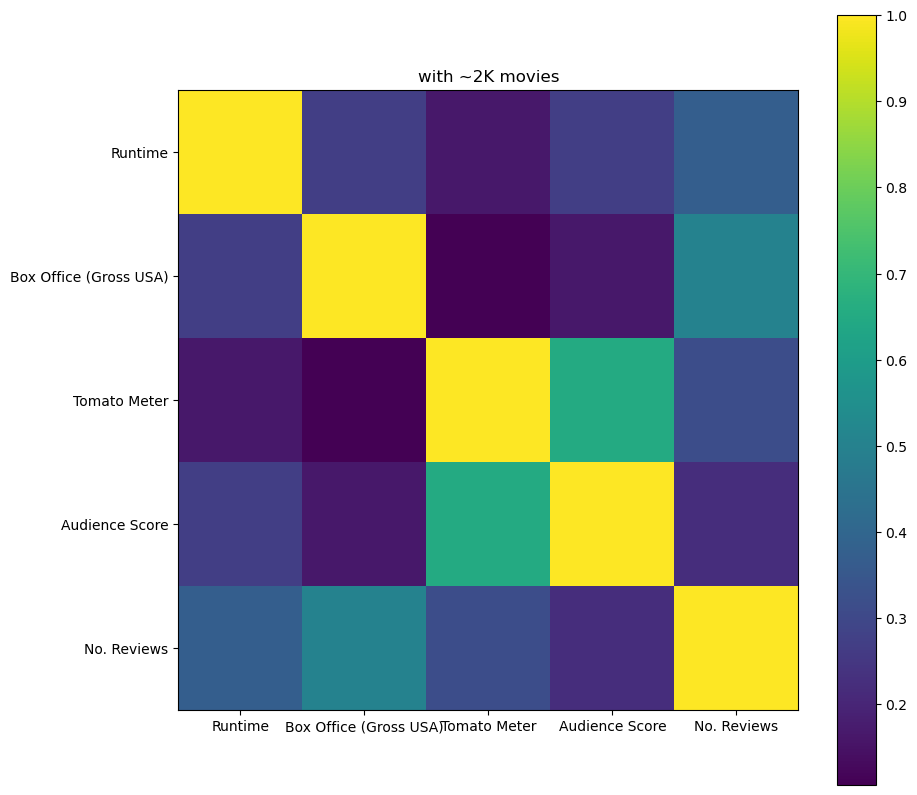

In [17]:



corr_s = medium_movies_data[q_features_s].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_s)
plt.xticks(range(len(corr_s.columns)), corr_s.columns)
plt.yticks(range(len(corr_s.columns)), corr_s.columns)
plt.colorbar()
plt.title("with ~2K movies")
plt.show()



In [18]:

medium_movies_data["Genre"].unique()



array(['Musical', 'Action', 'Biography', 'Adventure', 'Sci-fi',
       'Mystery & thriller', 'Horror', 'Comedy', 'Fantasy', 'Drama',
       'Western', 'Romance', 'War', 'Crime', 'Kids & family', 'History',
       'Holiday', 'Documentary'], dtype=object)

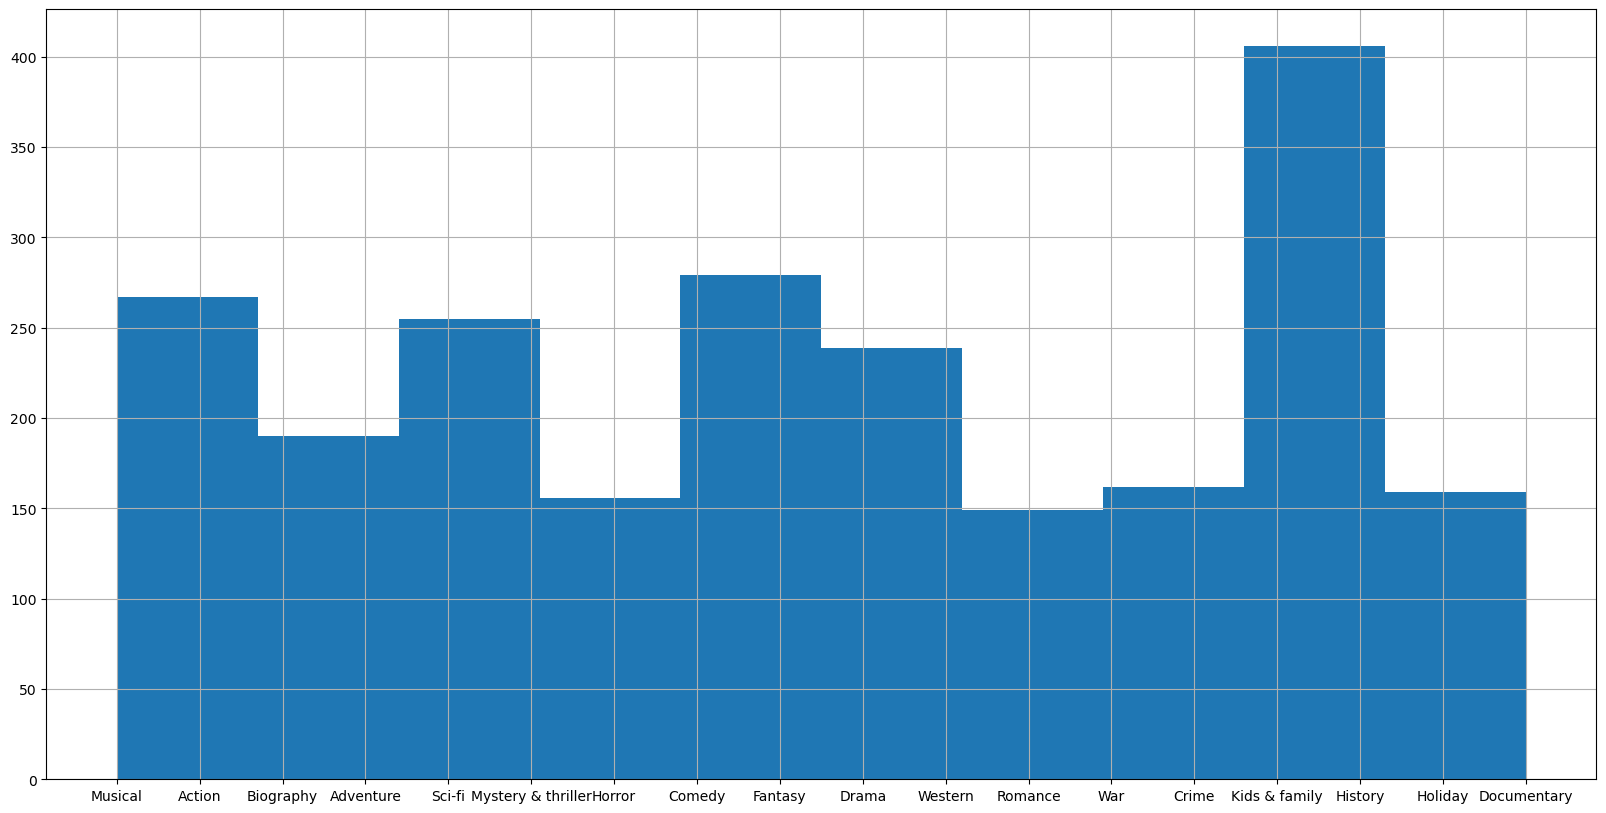

In [19]:

plt.figure(figsize=(20, 10))
medium_movies_data["Genre"].hist()
plt.show()


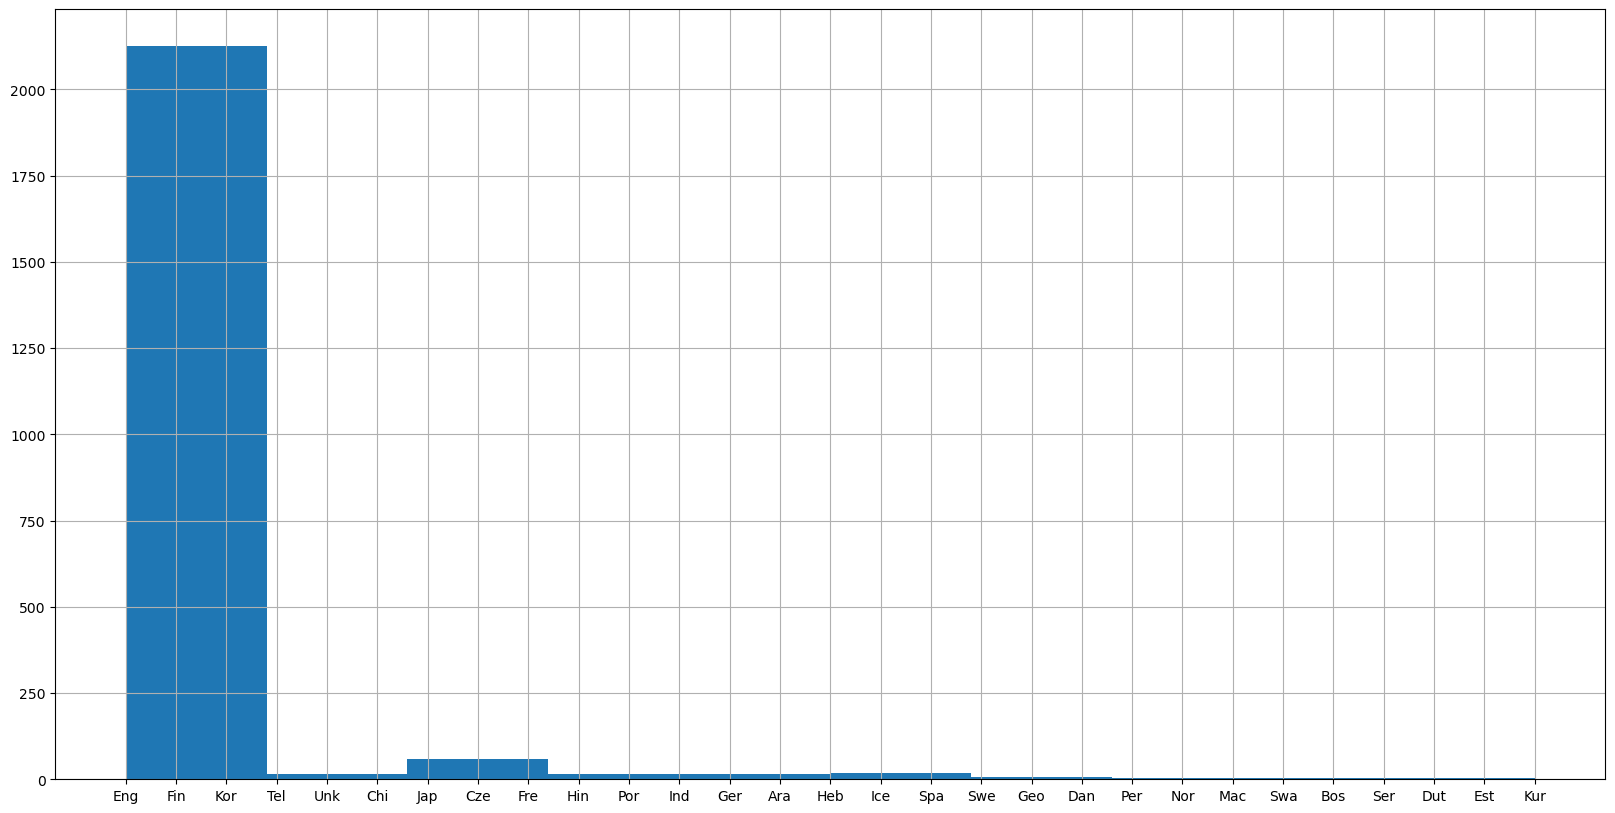

In [20]:

plt.figure(figsize=(20, 10))
medium_movies_data["Original Language"].hist()
plt.show()




<Figure size 1000x1000 with 0 Axes>

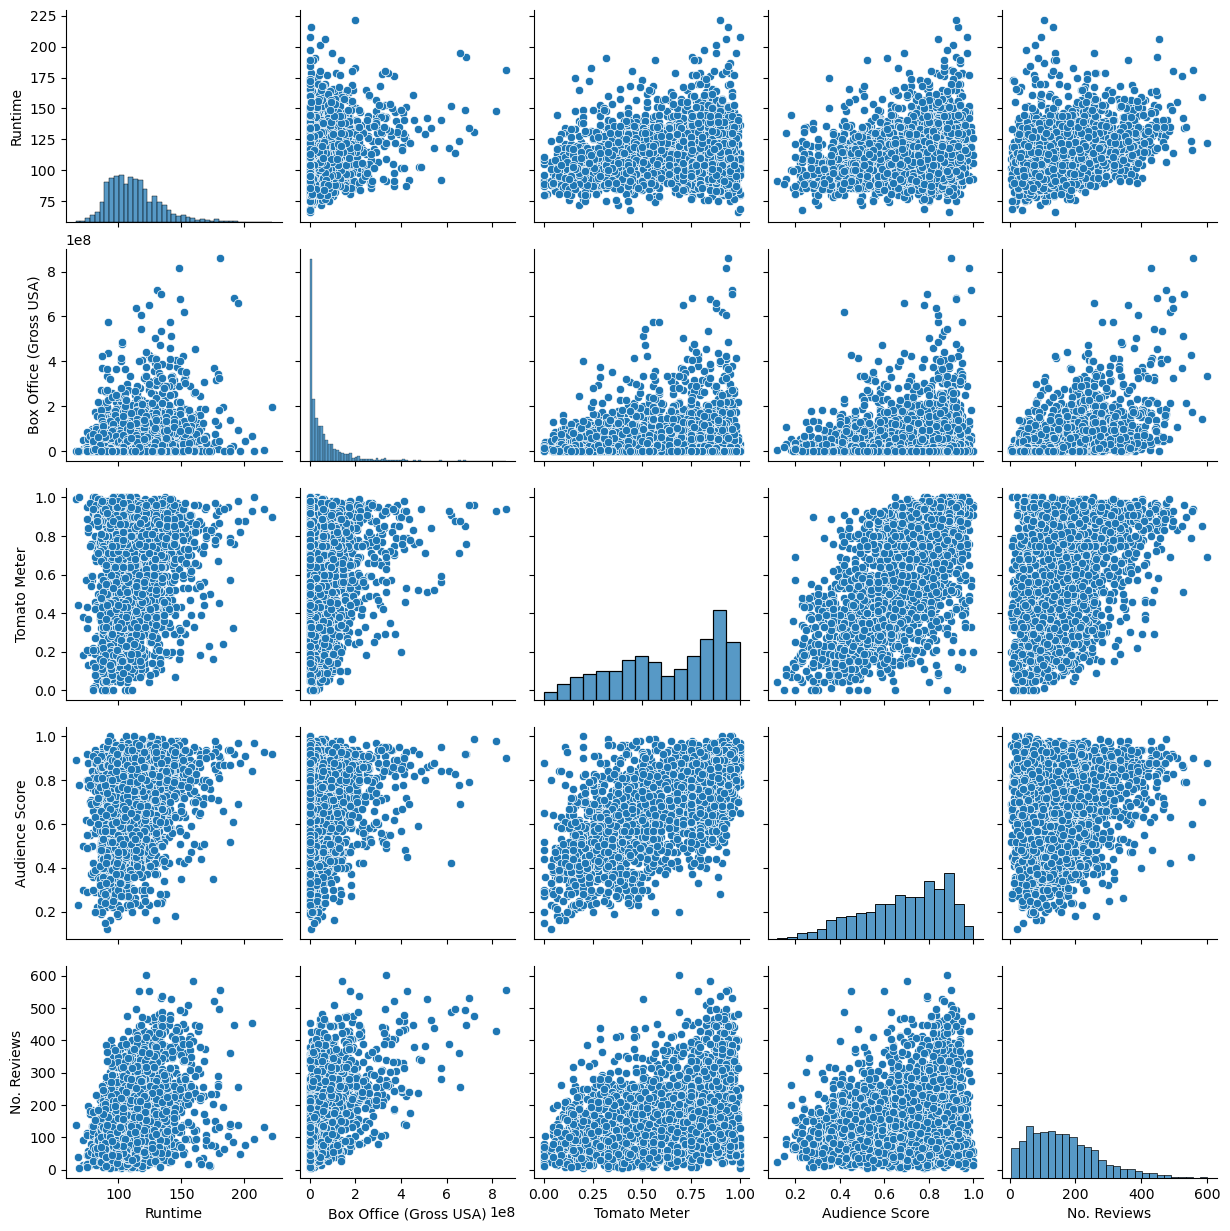

In [21]:

plt.figure(figsize=(10, 10))
sns.pairplot(medium_movies_data[q_features_s])
plt.show()


In [22]:


medium_movies_data.groupby(["Director", "Producer", "Writer"]).count()



,,,Title,Synopsis,Original Language,Runtime,Top Cast,Distributor,Production Co,Box Office (Gross USA),Tomato Meter,Audience Score,No. Reviews,Genre,Release Date (Theaters),Release Date (Streaming),Link,All Genres
Director,Producer,Writer,,,,,,,,,,,,,,,,
A.M. Lukas,"Julie Buck, Josh Hetzler, Josh Shader",Dan Schoffer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A.V. Rockwell,"Eddie Vaisman, Julia Lebedev, Lena Waithe, Rishi Rajani, Brad Weston",A.V. Rockwell,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Blaise, Robert Walker",Igor Khait,Tab Murphy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Horvath, Michael Jelenic","Christopher Meledandri, Shigeru Miyamoto",Matthew Fogel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Moorhead, Justin Benson","David Lawson Jr., Justin Benson, Aaron Moorhead, Thomas R. Burke, Leal Naim",Justin Benson,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Urushadze,"Zaza Urushadze, Ivo Felt, Tatjana Mülbeier, Artur Veeber",Zaza Urushadze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zhang-Ke Jia,Shozo Ichiyama,Zhang-Ke Jia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zoe Clarke-Williams,Frank Mancuso Jr.,"Victoria Strouse, Scott Ferraiolo",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [23]:


medium_movies_data.shape



(2262, 19)

In [24]:


medium_data_a



,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2220,0.0.2221,0.0.2222,0.0.2223,0.0.2224,0.0.2225,0.0.2226,0.0.2227,0.0.2228,0.0.2229
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2257,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2258,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:

medium_data_df_a


,Unnamed: 0,The Color Purple,The Beekeeper 2024,Aquaman And The Lost Kingdom,Napoleon 2023,Uncharted 2022,Fast X,Transformers Rise Of The Beasts,Star Wars The Rise Of Skywalker,Bullet Train 2022,...,Maverick,Damsel,The Wind 2019,The Good The Bad The Weird,Meeks Cutoff,In A Valley Of Violence,The Rider,Blackthorn,The Keeping Room,Marlina The Murderer In Four Acts
0,The Color Purple,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Beekeeper 2024,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aquaman And The Lost Kingdom,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Napoleon 2023,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Uncharted 2022,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,In A Valley Of Violence,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2258,The Rider,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259,Blackthorn,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,The Keeping Room,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


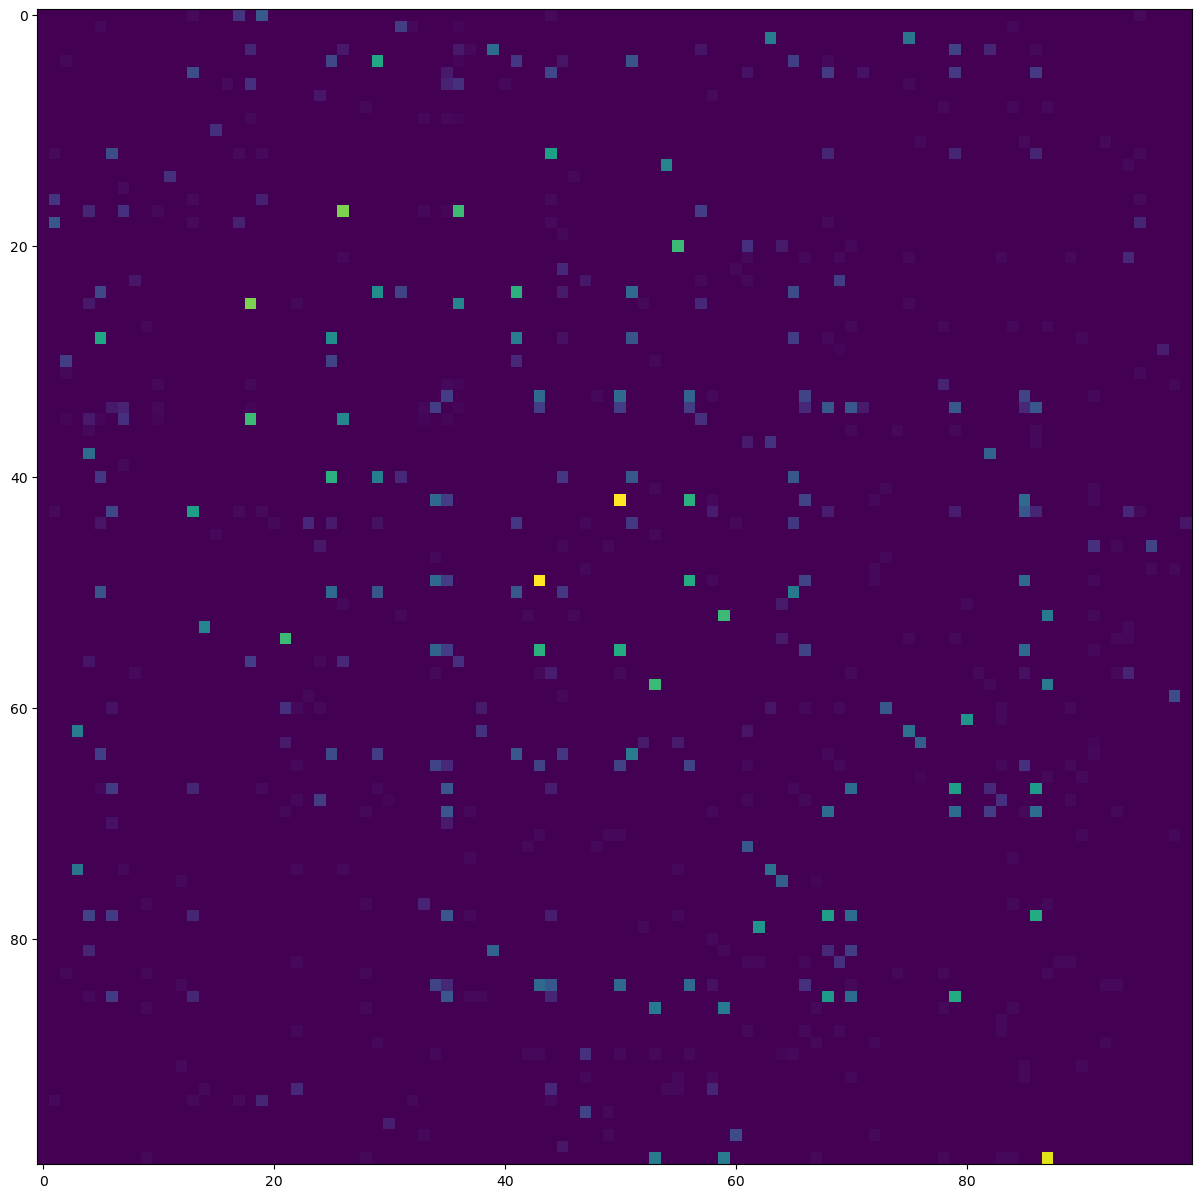

In [26]:

plt.figure(figsize=(15, 15))
plt.imshow(medium_data_a.values[:100, :100])
plt.show()



In [27]:
a = medium_data_a.values

for i in range(a.shape[0]):
    print(i, sum(a[i, :]))

0 16.877680652680656
1 24.98315108094518
2 27.275974025974016
3 17.233549783549794
4 15.013477698771815
5 16.818638306138304
6 17.42209249084249
7 9.366472416472417
8 3.1336080586080577
9 12.61605706385118
10 24.506672494172456
11 4.636352740396853
12 10.791870629370626
13 13.206158424908427
14 25.210770479520455
15 8.733825896325895
16 22.99617465867462
17 27.440130539395263
18 7.826087801087797
19 8.377109002108998
20 17.74284188034187
21 14.233012820512826
22 7.037271062271062
23 19.00790598290598
24 20.619780219780218
25 28.175918444300773
26 12.67838827838827
27 12.563983238983226
28 20.61105006105006
29 8.227496626180836
30 17.150382460676575
31 8.410554029304029
32 10.007952668246785
33 24.05554029304028
34 30.075568385862518
35 24.25306282769516
36 19.182051282051276
37 10.844444444444445
38 14.515888278388278
39 8.278823953823956
40 20.538095238095238
41 10.812637362637362
42 36.28759157509152
43 13.016870629370636
44 13.705692918192916
45 19.29426982331393
46 12.9506715506715

In [ ]:

input_data = pd.read_csv('../data/medium_data_a.csv', index_col=0)
G = nx.DiGraph(input_data.values)


In [ ]:
nx.draw(G)

# Data with around 4,000 movies


In [28]:
large_movies_data = pd.read_csv("../data/large_movies_data.csv", )
large_data_df_a = pd.read_csv("../data/large_data_df_a.csv", )
large_data_a = pd.read_csv("../data/large_data_a.csv", )

print(large_movies_data.shape, large_data_df_a.shape, large_data_a.shape)

(4245, 12) (4245, 4246) (4244, 4245)


In [29]:


features_m = [
    'Title', 'Synopsis', 'Original Language', 'Runtime', 
    'Director', 'Producer', 'Writer', 'Top Cast',
    'Distributor', 'Production Co', 
    'Box Office (Gross USA)', 
    'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
    'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'
]

q_features_m = ['Runtime', 'Tomato Meter', 'Audience Score', 'No. Reviews', ]

c_features_m = ['Original Language', 'Genre',]

network_columns_m = [ 'Director', 'Producer', 'Writer', 'Top Cast']



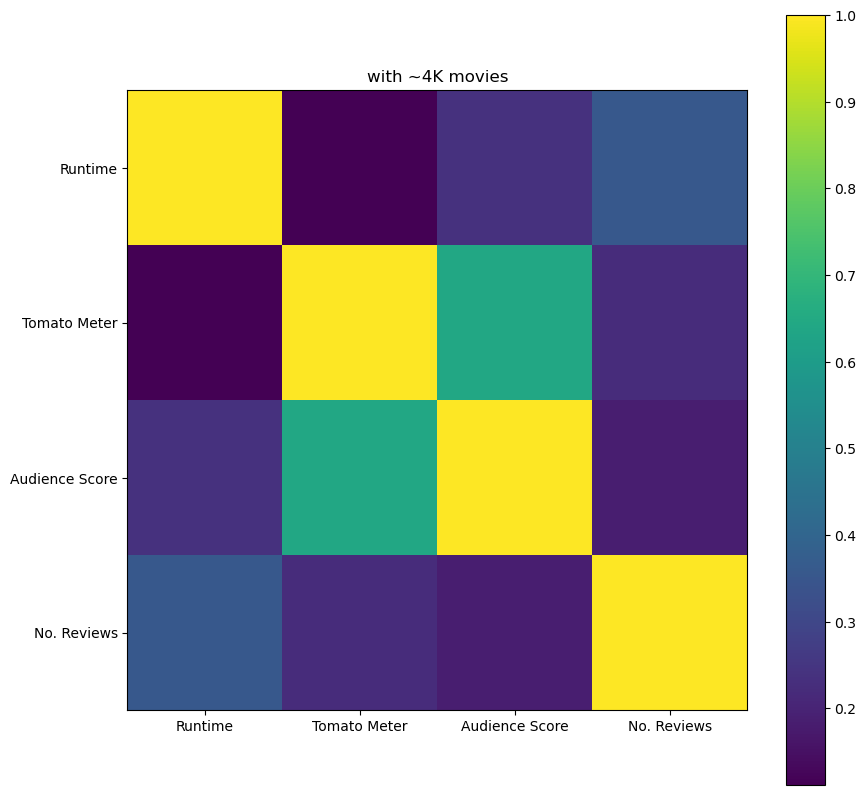

In [30]:



corr_m = large_movies_data[q_features_m].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_m)
plt.xticks(range(len(corr_m.columns)), corr_m.columns)
plt.yticks(range(len(corr_m.columns)), corr_m.columns)
plt.colorbar()
plt.title("with ~4K movies")
plt.show()




In [31]:


large_movies_data["Genre"].unique()


array(['Musical', 'Action', 'Biography', 'Sci-fi', 'Adventure',
       'Mystery & thriller', 'Horror', 'Drama', 'Comedy', 'Fantasy',
       'Western', 'Romance', 'War', 'Crime', 'Kids & family', 'History',
       'Holiday', 'Music', 'Documentary', 'Stand-up', 'Animation'],
      dtype=object)

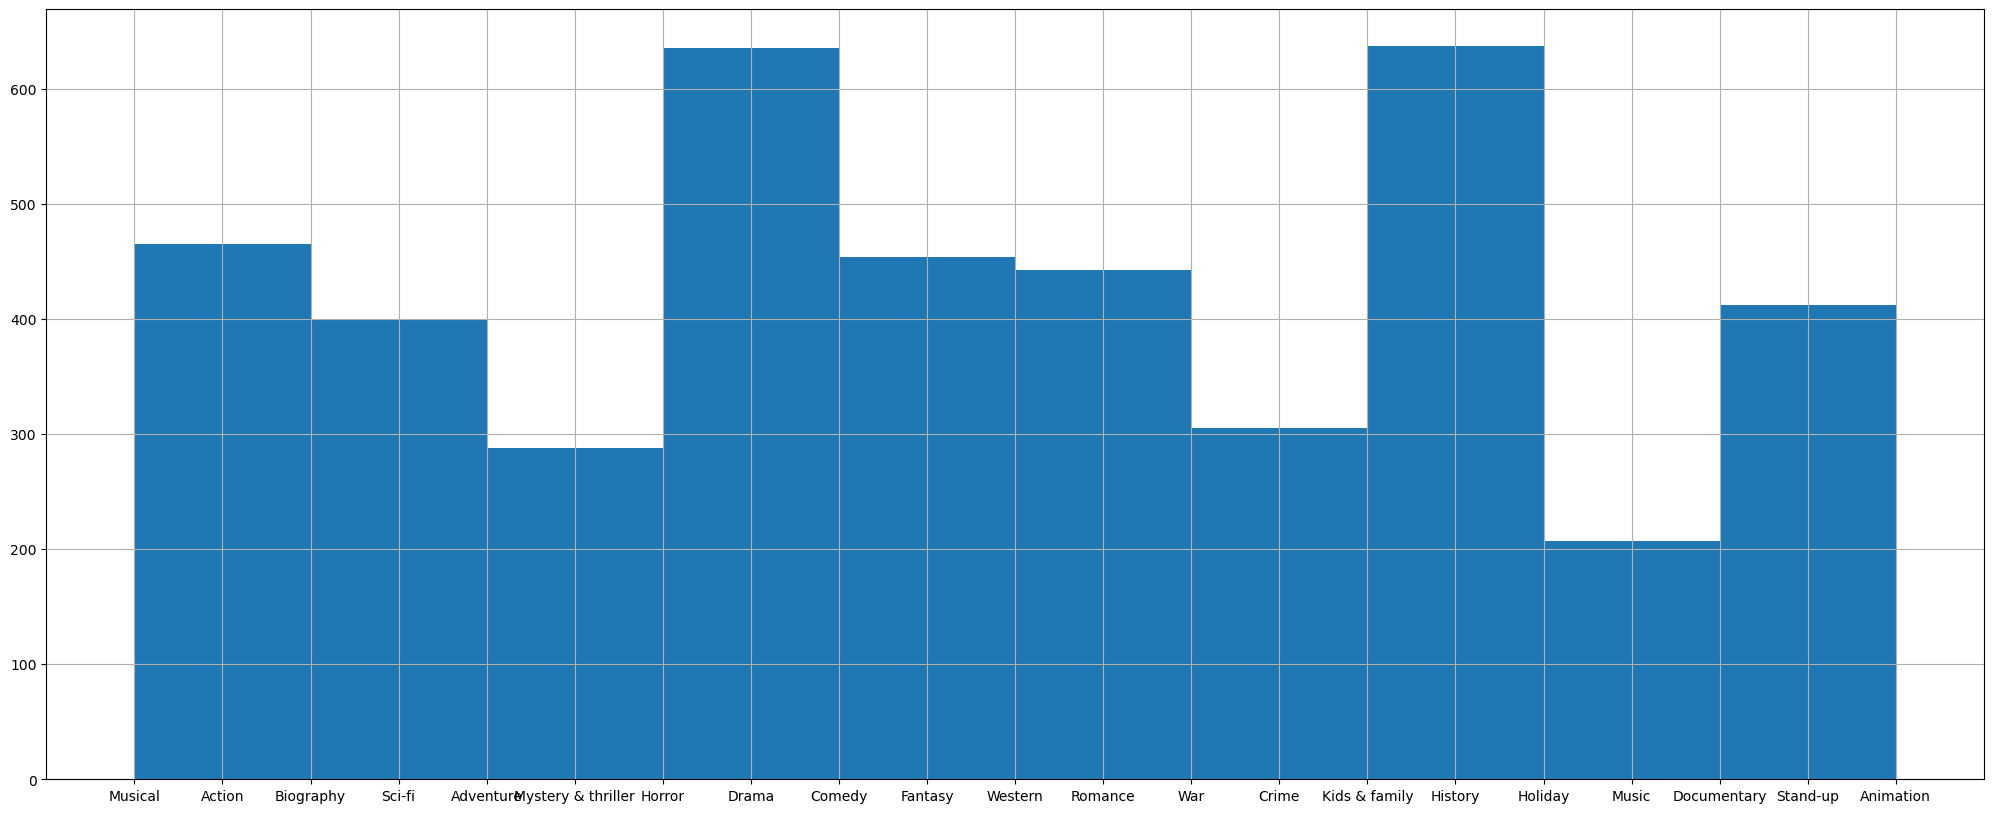

In [32]:

plt.figure(figsize=(25, 10))
large_movies_data["Genre"].hist()
plt.show()


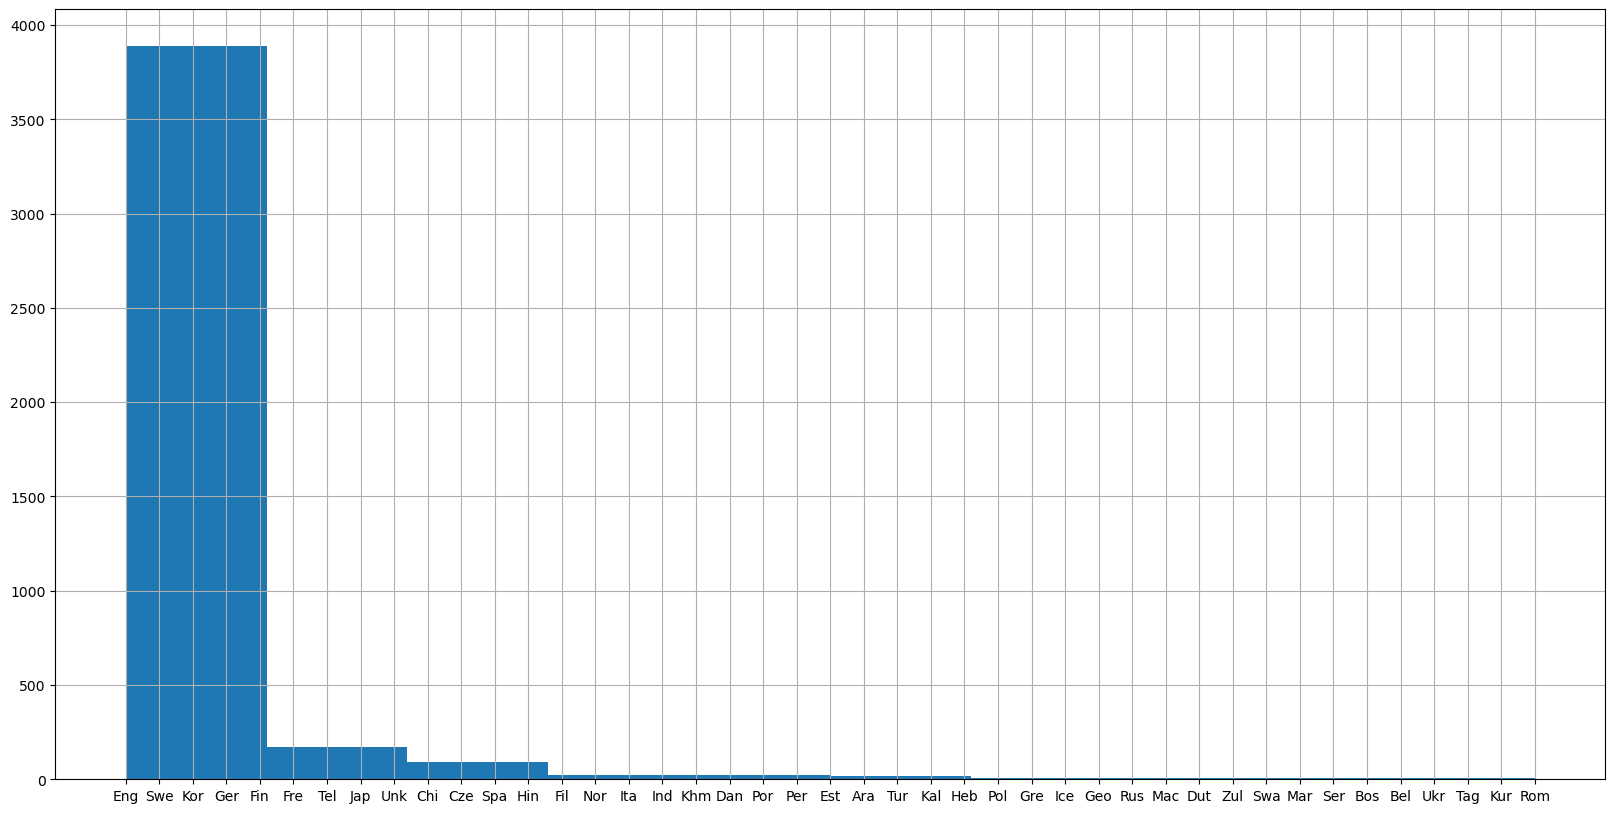

In [33]:


plt.figure(figsize=(20, 10))
large_movies_data["Original Language"].hist()
plt.show()



<Figure size 1000x1000 with 0 Axes>

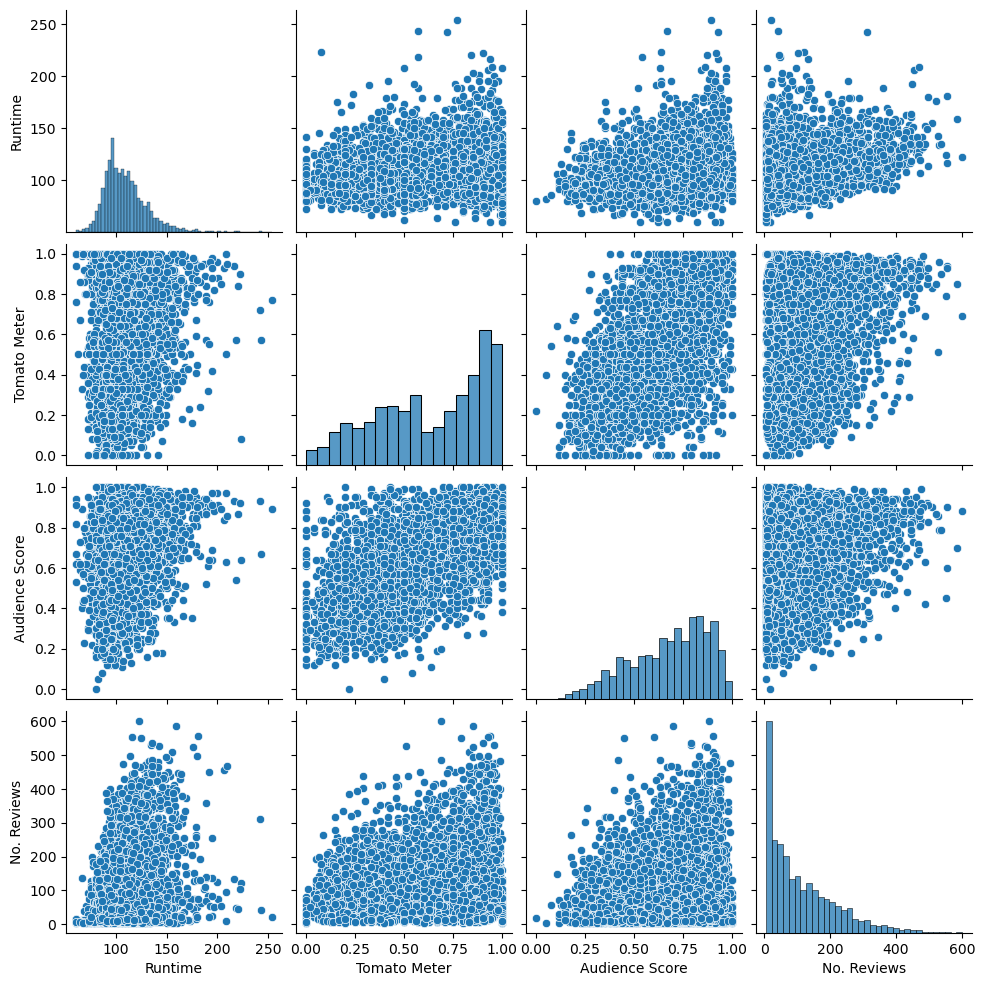

In [34]:



plt.figure(figsize=(10, 10))
sns.pairplot(large_movies_data[q_features_m])
plt.show()



In [37]:

large_movies_data.groupby(["Director", ]).count()


,Title,Synopsis,Original Language,Runtime,Top Cast,Tomato Meter,Audience Score,No. Reviews,Genre,Link,All Genres
Director,,,,,,,,,,,
A.J. Eaton,1,1,1,1,1,1,1,1,1,1,1
A.M. Lukas,1,1,1,1,1,1,1,1,1,1,1
A.V. Rockwell,1,1,1,1,1,1,1,1,1,1,1
"Aaron Aites, Audrey Ewell",1,1,1,1,1,1,1,1,1,1,1
Aaron B. Koontz,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zoe Clarke-Williams,1,1,1,1,1,1,1,1,1,1,1
Zoya Akhtar,2,2,2,2,2,2,2,2,2,2,2
Éric Besnard,1,1,1,1,1,1,1,1,1,1,1


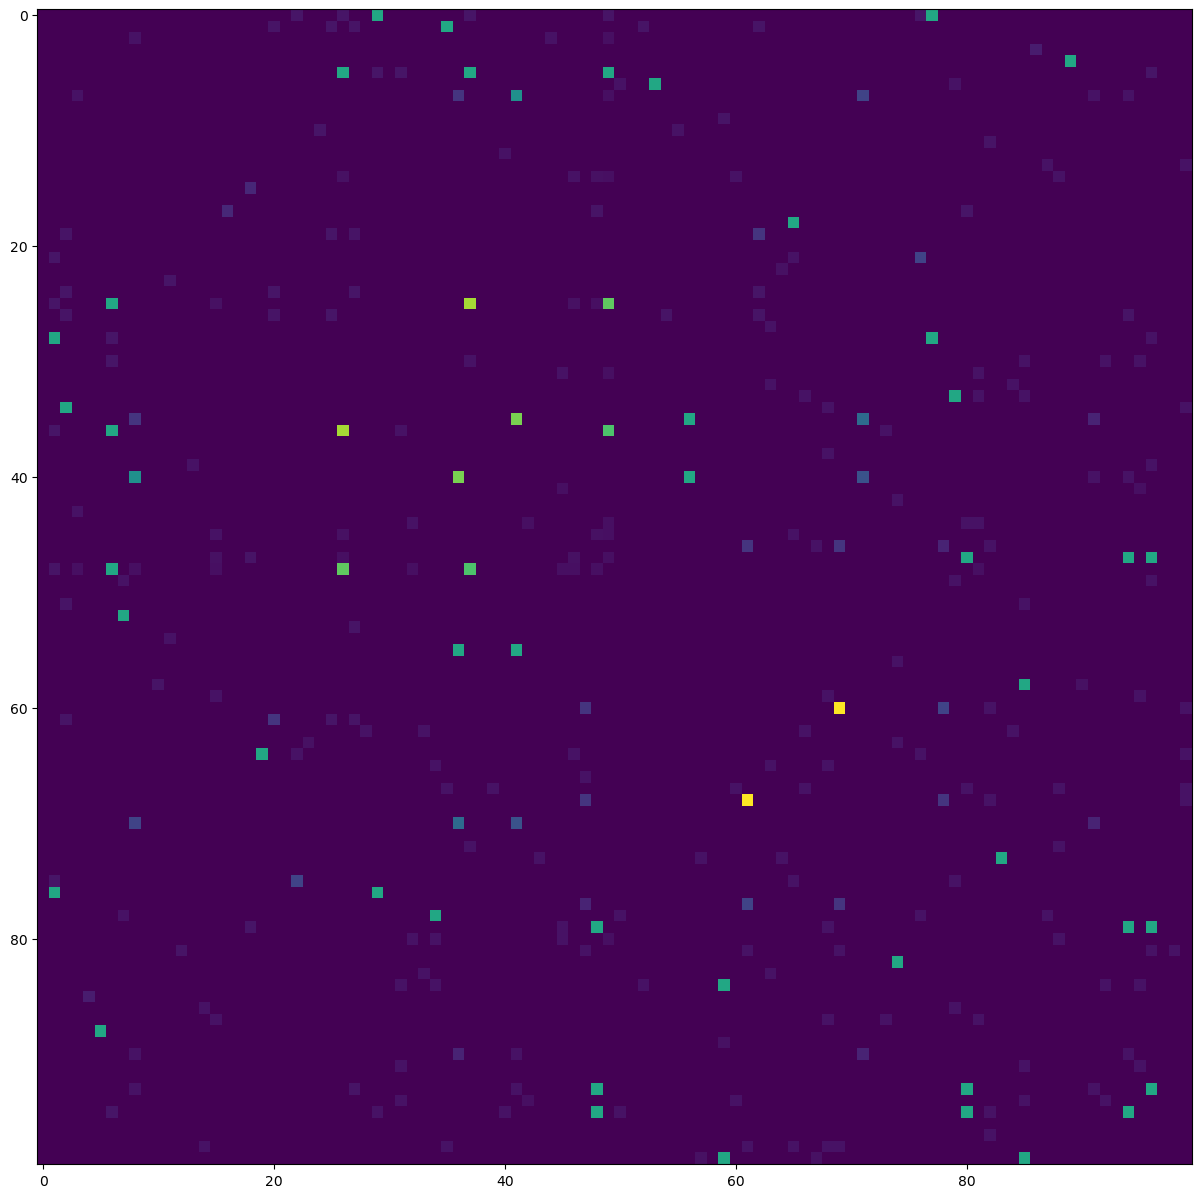

In [38]:

plt.figure(figsize=(15, 15))
plt.imshow(large_data_a.values[:100, :100])
plt.show()



In [39]:


b = large_data_a.values

for i in range(b.shape[0]):
    print(i, sum(b[i, :]))

0 9.923299127343233
1 11.220862470862476
2 11.870272293066419
3 7.142016521060638
4 19.101623376623373
5 12.449572649572652
6 7.572972860472857
7 7.6089322442263585
8 4.370532245532241
9 10.97531218781219
10 8.48659465534465
11 7.340034965034957
12 3.9518315018315016
13 5.43956043956044
14 10.8335173813115
15 6.511264144352373
16 4.92117465867466
17 9.391567174655414
18 6.713558867602979
19 3.5960372960372955
20 0.0
21 5.514690170940172
22 6.2908986846486865
23 36.61609501609494
24 12.850341325341331
25 17.862283794636745
26 4.06952214452214
27 9.273525086025087
28 10.643424630924635
29 2.506168831168831
30 5.305036630036628
31 3.5919117647058814
32 3.038461538461539
33 12.618638306138308
34 13.18665293040294
35 8.07097069597069
36 16.070381824058263
37 3.8235042735042737
38 2.3967948717948713
39 8.736617549117547
40 9.037853812853808
41 3.6293839201733906
42 4.9837157940099095
43 3.651445082695083
44 5.137778836230849
45 9.01704912734324
46 8.430540293040291
47 14.53949334978748
48 15

1435 3.323934398934399
1436 3.7884615384615383
1437 8.707646520146518
1438 6.029304029304029
1439 10.365250925545034
1440 3.5000000000000013
1441 6.751502174296297
1442 4.599975024975025
1443 12.224908424908433
1444 8.408644133644128
1445 13.960268612106868
1446 18.894230769230756
1447 4.87094384373796
1448 9.151803670186025
1449 0.1666666666666666
1450 17.10269750674162
1451 11.601544289044297
1452 24.696449383949375
1453 9.231351981351981
1454 2.333916083916084
1455 0.0
1456 11.123499417249418
1457 5.8045671648612815
1458 8.721736596736594
1459 6.567765567765564
1460 5.62096419662209
1461 8.467948717948715
1462 0.0
1463 11.984501609501619
1464 1.4999999999999996
1465 3.61361693861694
1466 13.270038295038313
1467 4.408333333333333
1468 7.402617521367516
1469 9.410714285714283
1470 9.160714285714283
1471 4.828267076061193
1472 0.4166666666666665
1473 10.322581585081586
1474 4.526098901098902
1475 2.876165501165501
1476 7.16713286713286
1477 8.305985680985675
1478 11.34892191142191
1479

2825 5.077505827505827
2826 1.496794871794871
2827 2.9505827505827504
2828 0.9051282051282046
2829 4.836434398934399
2830 3.4824786324786334
2831 9.406372793872793
2832 3.4722222222222228
2833 3.6244103119103124
2834 2.1666666666666665
2835 1.9210372960372948
2836 0.0833333333333333
2837 10.320369907869905
2838 4.195512820512822
2839 6.334065934065934
2840 1.576923076923076
2841 1.4775641025641018
2842 6.213279286073401
2843 29.618656343656266
2844 1.583333333333333
2845 3.1273809523809524
2846 9.752963702963706
2847 4.196634615384616
2848 2.075582750582749
2849 2.2621212121212113
2850 0.0
2851 10.02862276612277
2852 1.9134615384615372
2853 4.66628787878788
2854 8.474015567765562
2855 0.3333333333333332
2856 1.4541666666666657
2857 4.013888888888889
2858 9.0237012987013
2859 1.253787878787878
2860 1.8666666666666667
2861 5.342880730380728
2862 2.3991161616161607
2863 5.739339826839825
2864 2.045454545454545
2865 3.747377622377623
2866 0.49999999999999983
2867 1.4967948717948714
2868 1.

4200 7.073717948717945
4201 1.3312499999999992
4202 2.833333333333333
4203 1.6634615384615374
4204 3.338461538461539
4205 3.3440476190476183
4206 5.666666666666666
4207 0.7690170940170936
4208 1.8814102564102557
4209 0.9583333333333327
4210 7.4583333333333295
4211 9.788461538461538
4212 5.996794871794871
4213 6.100961538461536
4214 2.840909090909091
4215 4.5
4216 5.073717948717946
4217 1.91025641025641
4218 4.347756410256411
4219 7.999999999999994
4220 9.791666666666666
4221 3.2467948717948714
4222 2.997835497835497
4223 1.8301282051282048
4224 3.833916083916084
4225 6.333333333333329
4226 1.9519230769230762
4227 0.8896303696303691
4228 2.2467948717948714
4229 2.8333333333333335
4230 4.157509157509157
4231 3.157051282051281
4232 0.9940476190476184
4233 3.5
4234 2.4311383061383056
4235 6.228479853479847
4236 1.1634615384615383
4237 5.744047619047618
4238 5.833333333333332
4239 3.397893772893772
4240 1.9426282051282038
4241 2.9102564102564106
4242 7.234830447330442
4243 0.0


In [ ]:




# input_data_ = pd.read_csv('../data/large_data_a.csv', index_col=0)
# G = nx.DiGraph(input_data_.values)
# nx.draw(G)
